In [15]:
import keras 
# Imports the Keras library, which is used to build and train neural networks.
# A high-level deep learning library that runs on top of frameworks like TensorFlow.
# Makes it easier to define, train, and test neural network models.
from keras.models import Sequential
# Imports the Sequential model from Keras.
# A linear stack of layers in a neural network.
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# Imports different types of layers to build a neural network.
# Conv2D-"2D Convolutional Layer"-Used to extract features like edges, textures, and patterns from images.
# MaxPooling2D-A pooling layer that reduces the spatial dimensions of the image (height × width).
# Prevents overfitting.
# Flatten-Flattens a multi-dimensional array into a single vector.
# Dense-A fully connected layer. Every node in this layer is connected to all nodes in the previous layer.
# Dropout-A regularization technique that randomly "drops" some nodes during training to prevent overfitting.
# BatchNormalization-Normalizes the input of a layer to improve training stability and speed.
from PIL import Image
# Imports the Image module from the Python Imaging Library (PIL).
import numpy as np
# A library for numerical computations.
import pandas as pd
# A library for data manipulation and analysis.
# Useful for loading and preprocessing datasets.
import matplotlib.pyplot as plt
# Imports the plotting module of Matplotlib 
plt.style.use('dark_background')
# Sets the style of plots to have a dark background.
from sklearn.model_selection import train_test_split
# Splits the dataset into two parts.
# Training data-Used to train the model.
# Testing data-Used to evaluate the model's performance.
from sklearn.preprocessing import OneHotEncoder 
# Converts categorical labels into a one-hot encoded format [1, 0].
from keras.utils import to_categorical, plot_model
# to_categorical-Converts numerical labels (e.g., 0, 1, 2) into one-hot encoded vectors.
# Commonly used for multi-class classification tasks.
# plot_model-Generates a visual diagram of the neural network
import os
# Provides functions to interact with the operating system.
# Useful for tasks like reading/writing files, navigating directories, or handling file paths.

In [27]:
from sklearn.preprocessing import LabelEncoder
# It converts categorical labels into numerical labels.
# Used for converting string class names into numerical indices required for model training.
label_encoder = LabelEncoder()
# Creates an instance of LabelEncoder and fits it to a list of skin disease names.
# "Atopic Dermatitis" -> 0
# "Herpes" -> 1
# "Lyme disease" -> 2
# "Poison Ivy" -> 3
# "Psoriasis" -> 4
# "Rosacea" -> 5

label_encoder.fit(["Atopic Dermatitis", "Herpes", "Lyme disease", "Poison Ivy", "Psoriasis", "Rosacea"])

data = [] #To store processed image arrays.
labels = [] # To store corresponding encoded labels.

#  Loops through each folder named after the diseases to process images
for disease_folder in ["Atopic Dermatitis", "Herpes", "Lyme disease", "Poison Ivy", "Psoriasis", "Rosacea"]:
    class_index = label_encoder.transform([disease_folder])[0]
#     Converts the disease name into its corresponding numerical label.
    class_label = to_categorical(class_index, num_classes=6)
#     Converts the numerical label into a one-hot encoded vector.
    paths = []
    for r, d, f in os.walk(os.path.join(r"C:\Users\HP\Downloads\skin deseases\skin deseases", disease_folder)):#traverses the directory for the current disease.
        for file in f:
            if file.lower().endswith(('.jpg', '.jpeg')):
                paths.append(os.path.join(r, file))

    for path in paths:
        img = Image.open(path)#Opens the image file at the given path.
        img = img.resize((128, 128))#Resizes the image to 128 × 128 pixels.
        img = np.array(img)#Converts the image into a NumPy array 
        if img.shape == (128, 128, 3):#Ensures the image is an RGB image with the correct dimensions (128 × 128 × 3).
            data.append(img)
            labels.append(class_label)
#Adds the processed image to data and its corresponding one-hot encoded label to labels.

data = np.array(data)
labels = np.array(labels)
# Converts data and labels lists into NumPy arrays 

print(data.shape)
print(labels.shape)
# (1642, 128, 128, 3)  # 1642 RGB images of size 128 × 128
# (1642, 6)            # 1642 labels, one-hot encoded into 6 categories

(1642, 128, 128, 3)
(1642, 6)


In [29]:
data=np.array(data)
data.shape

(1642, 128, 128, 3)

In [31]:
result=np.array(labels)#NumPy arrays are optimized for numerical operations.
                       # This is necessary for tasks like reshaping, training models
result=result.reshape(1642,-1)# Reshapes the result array into a 2D array with 1642 rows and 
                              # an automatically calculated number of columns.
    
# The -1 in columns indicates that NumPy should automatically 
# determine the number of columns based on the total number 
# of elements and the specified rows.

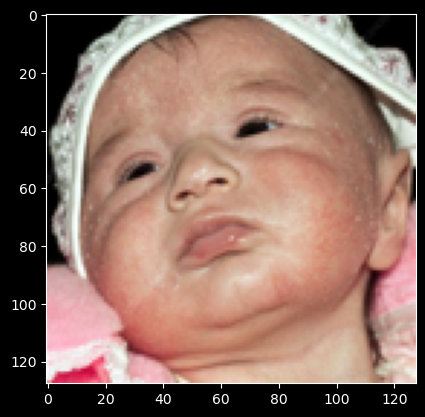

In [35]:
plt.imshow(data[5])

In [37]:
x_train,x_test,y_train,y_test = train_test_split(data,result, test_size=0.2, shuffle=True, random_state=42)

In [39]:
output_classes = 6
# Sets the number of output classes for classification. 
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))
model.add(Dropout(0.45))

# Conv2D(32)-Adds a convolutional layer with 32 filters.
# Kernel size: (2, 2) – A small filter size for detecting features.
# Input Shape: (128, 128, 3) for RGB images resized to 128x128.
# Padding = 'Same'- Keeps the output feature map size the same as the input size.
# Activation-The ReLU function helping the model learn complex patterns.
# Dropout(0.45)-Randomly drops 45% of neurons during training to prevent overfitting.

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# BatchNormalization-Normalizes the activations of the previous layer to stabilize and speed up training.
# MaxPooling2D(pool_size=(2, 2))-Reduces the spatial size (width & height).
# Dropout(0.25)-Adds another dropout layer to reduce overfitting.

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Strides=(2, 2)- Moves the pooling window by 2 pixels at a time,reducing the feature map size.
model.add(Flatten())
# Converts the 2D feature maps into a 1D vector that can be fed into dense (fully connected) layers.
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Dense(512, activation='relu')-Fully connected layer with 512 neurons.
# ReLU Activation- Helps the model learn non-linear patterns.
# Dropout(0.5)-Drops 50% of neurons to prevent overfitting.
# Dense(6, activation='softmax')-Output layer with 6 neurons, one for each class.
# Softmax Activation- Converts the outputs into probabilities that sum to 1, useful for multi-class classification.

print(model.summary())

# Displays the model architecture, layer-by-layer,Output shapes of each layer.
# Number of parameters to be learned (weights + biases).

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,587,654 (128.13 MB)

 Trainable params: 33,587,462 (128.13 MB)

 Non-trainable params: 192 (768.00 B)

None


In [41]:
model.compile(loss = "categorical_crossentropy", optimizer='Adam',metrics=['accuracy'])

# Loss Function: Guides the optimization by measuring the error.
# Optimizer: Updates the model's weights to minimize the loss function.
# Metrics: Tracks the model's performance during training and testing.

In [43]:
x_train.shape

(1313, 128, 128, 3)

In [45]:
y_train.shape

(1313, 6)

In [47]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 20, verbose = 1,validation_data = (x_test, y_test))

#  epochs=15-Specifies the number of complete passes through the entire training dataset.
#  batch_size=256-Specifies the number of samples processed before updating the model's weights.
# Larger batch sizes are more stable but require more memory and take longer for updates.
# verbose=1-Controls the level of output during training.
# verbose=0: No output.
# verbose=1: Displays a progress bar with metrics for each epoch.
# verbose=2: Displays one line of metrics for each epoch without a progress bar.

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 65s 774ms/step - accuracy: 0.2062 - loss: 27.3744 - val_accuracy: 0.1307 - val_loss: 3.6228
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 50s 760ms/step - accuracy: 0.2476 - loss: 1.8316 - val_accuracy: 0.1307 - val_loss: 5.3991
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 50s 750ms/step - accuracy: 0.2650 - loss: 1.7778 - val_accuracy: 0.1763 - val_loss: 4.5180
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 82s 744ms/step - accuracy: 0.2915 - loss: 1.6988 - val_accuracy: 0.2492 - val_loss: 2.9757
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 82s 746ms/step - accuracy: 0.2760 - loss: 1.7174 - val_accuracy: 0.2553 - val_loss: 3.7809
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 50s 757ms/step - accuracy: 0.2734 - loss: 1.6957 - val_accuracy: 0.2067 - val_loss: 3.9254
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 81s 741ms/step - accuracy: 0.2980 - loss: 1.6703 - val_accuracy: 0.1793 - val_loss: 4.9321
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 82s 741ms/step - accuracy: 0.2739 - loss: 1.7025 - val_acc

In [51]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.2640 - loss: 2.9736
Test Accuracy: 0.2735562324523926


In [53]:
def names(number):
    if number==0:
        return "Atopic Dermatitis"
    elif number==1:
        return "Herpes"
    elif number==2:
        return "Lyme disease"
    elif number==3:
        return "Poison Ivy"
    elif number==4:
        return "Psoriasis"
    else:
        return "Rosacea"

40.87711274623871% Confidence This Is Herpes


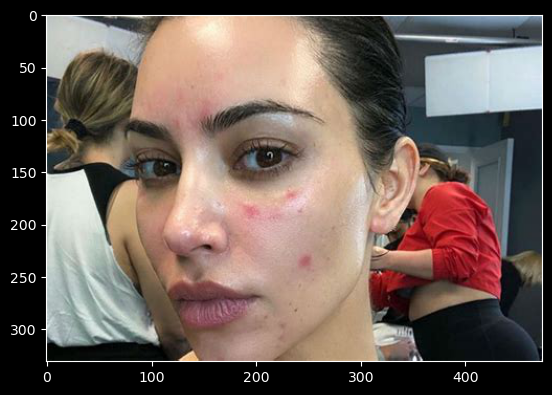

In [55]:
from matplotlib.pyplot import imshow
#  Imports the imshow function to display the image in a plot.
img = Image.open(r"C:\Users\HP\Downloads\skin deseases\skin deseases\Psoriasis\image8.jpg")
x = np.array(img.resize((128,128)))
# Image.open-Opens the image located at the specified path.
# resize((128, 128))-Resizes the image to 128x128 pixels to match the input dimensions.
# np.array- Converts the image into a NumPy array for numerical processing
x = x.reshape(-1,128,128,3)
# Reshapes the image array to include a batch dimension.
# Original Shape: (128, 128, 3) (single image)
# Reshaped Shape: (1, 128, 128, 3) (batch with one image)
res = model.predict_on_batch(x)
# model.predict_on_batch(x)-Makes a prediction on the input batch.
# Output (res): A 2D array of shape (1, 6), where each value represents 
# the predicted probability for one of the six classes.
classification = np.where(res == np.amax(res))[1][0]
# np.amax(res)- Finds the highest probability in the prediction array.
# np.where(res == np.amax(res))-Returns the indices where the maximum value occurs.
# The second index ([1]) represents the class label.
# [0]- Extracts the class label as a single value.
imshow(img)
# Displays the input image.
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))
# res[0][classification]- The probability of the predicted class.
# *100- Converts it to a percentage.
# Predicted Class Name-names(classification): Uses the names function to get the class name for the predicted label.

65.14859795570374% Confidence This Is Herpes


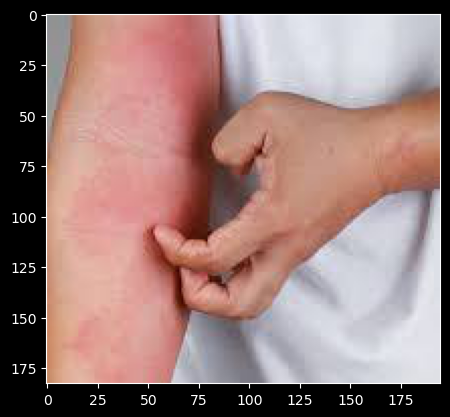

In [57]:
from matplotlib.pyplot import imshow
#  Imports the imshow function to display the image in a plot.
img = Image.open(r"C:\Users\HP\Downloads\img.jpg")
x = np.array(img.resize((128,128)))
# Image.open-Opens the image located at the specified path.
# resize((128, 128))-Resizes the image to 128x128 pixels to match the input dimensions.
# np.array- Converts the image into a NumPy array for numerical processing
x = x.reshape(-1,128,128,3)
# Reshapes the image array to include a batch dimension.
# Original Shape: (128, 128, 3) (single image)
# Reshaped Shape: (1, 128, 128, 3) (batch with one image)
res = model.predict_on_batch(x)
# model.predict_on_batch(x)-Makes a prediction on the input batch.
# Output (res): A 2D array of shape (1, 6), where each value represents 
# the predicted probability for one of the six classes.
classification = np.where(res == np.amax(res))[1][0]
# np.amax(res)- Finds the highest probability in the prediction array.
# np.where(res == np.amax(res))-Returns the indices where the maximum value occurs.
# The second index ([1]) represents the class label.
# [0]- Extracts the class label as a single value.
imshow(img)
# Displays the input image.
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))